# **RECOMPRA EM E-COMMERCE: ANÁLISES INICIAIS E ÁRVORE DE DECISÃO BINÁRIA**



### Instalação de bibliotecas

In [1]:
# Apenas a biblioteca shap precisa ser instalada; as demais utilizadas neste notebook já vêm pré-instaladas no Google Colab
! pip install shap

### Carregamento de bibliotecas

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree                                       # Árvore de decisão
from sklearn.model_selection import train_test_split           # Separação de conjuntos de treino e teste
from sklearn.metrics import accuracy_score, confusion_matrix   # Análise de desempenho binária (acurácia, sensibilidade e especificidade)
from sklearn.metrics import roc_auc_score, roc_curve           # Curva ROC
from sklearn.model_selection import cross_val_score            # Validação cruzada
from sklearn.model_selection import KFold, cross_validate      # Validação cruzada
from sklearn.model_selection import GridSearchCV               # Otimização de hiperparâmetros via grid search
from sklearn.model_selection import RandomizedSearchCV         # Otimização de hiperparâmetros via random search
import shap                                                    # Interpretabilidade de modelos de ML

/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Leitura da base de dados

In [3]:
dados_ecommerce = pd.read_table("../Dados/Recompra_eCommerce.txt", sep = "\t")

### Visualização da base de dados

In [4]:
display(dados_ecommerce)

,ID_CLIENTE,IDADE,VALOR_COMPRA_SITE,QTDE_ITENS_COMPRA_SITE,FLAG_ACESSORIOS_COMPRA_SITE,FLAG_FEMININA_COMPRA_SITE,FLAG_MASCULINA_COMPRA_SITE,NOTA_SATISF_COMPRA_SITE,FLAG_COMPROU_LOJA_FISICA_6M,QTDE_COMPRAS_LOJA_FISICA_6M,QTDE_ITENS_LOJA_FISICA_6M,FLAG_RECOMPRA_PROX_3_MESES
0,1,29,185.5,2,0,1,0,7,1,4,4,1
1,2,27,215.5,2,0,1,1,7,1,2,2,1
2,3,29,106.4,4,0,1,0,10,1,1,5,1
3,4,18,140.2,1,0,1,0,8,1,1,4,0
4,5,24,72.9,2,0,1,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1270,40,165.9,6,0,1,0,8,1,3,9,1
1270,1271,33,55.6,1,0,1,0,9,0,0,0,0
1271,1272,28,105.7,4,0,0,1,6,0,0,0,0
1272,1273,28,284.9,3,0,1,1,8,0,0,0,0


### Análise exploratória breve

In [69]:
# Medidas resumo
dados_ecommerce.describe()

,ID_CLIENTE,IDADE,VALOR_COMPRA_SITE,QTDE_ITENS_COMPRA_SITE,FLAG_ACESSORIOS_COMPRA_SITE,FLAG_FEMININA_COMPRA_SITE,FLAG_MASCULINA_COMPRA_SITE,NOTA_SATISF_COMPRA_SITE,FLAG_COMPROU_LOJA_FISICA_6M,QTDE_COMPRAS_LOJA_FISICA_6M,QTDE_ITENS_LOJA_FISICA_6M,FLAG_RECOMPRA_PROX_3_MESES,y_pred
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,637.500000,30.339089,209.753061,2.302983,0.213501,0.827316,0.650706,7.846939,0.552590,0.948195,2.031397,0.526688,0.535322
std,367.916431,7.943314,119.275819,1.356677,0.409939,0.378123,0.476934,1.557778,0.497422,1.277204,2.273994,0.499483,0.498947
min,1.000000,18.000000,21.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,319.250000,25.000000,122.150000,1.000000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,637.500000,29.000000,190.100000,2.000000,0.000000,1.000000,1.000000,8.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,955.750000,34.000000,273.150000,3.000000,0.000000,1.000000,1.000000,9.000000,1.000000,1.000000,4.000000,1.000000,1.000000
max,1274.000000,74.000000,727.300000,10.000000,1.000000,1.000000,1.000000,10.000000,1.000000,12.000000,15.000000,1.000000,1.000000


### Análise bivariada: features vs. target

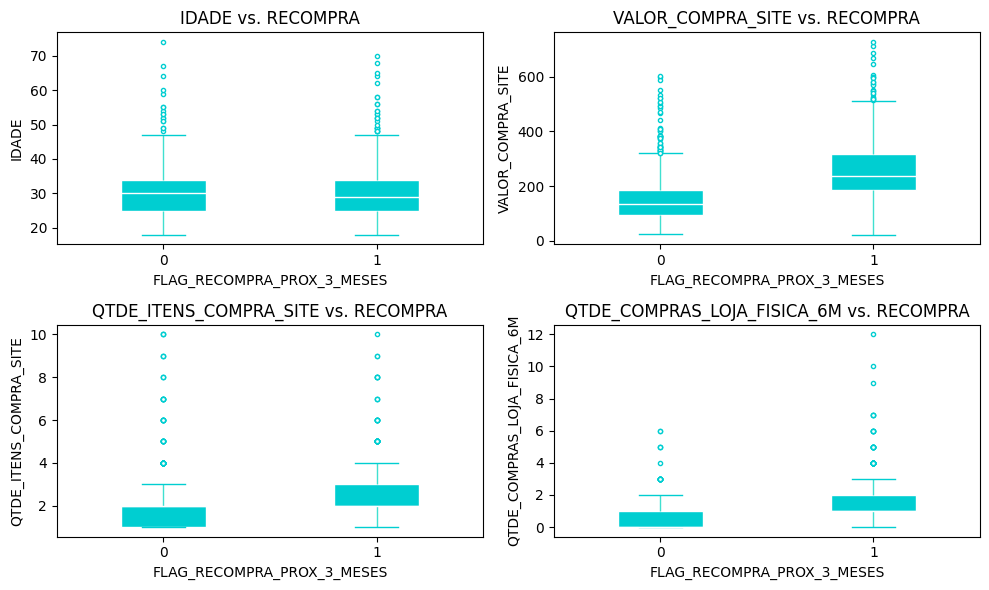

In [6]:
# Gráfico de boxplots: variáveis explicativas quantitativas versus recompra
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))

variaveis = ['IDADE', 'VALOR_COMPRA_SITE', 'QTDE_ITENS_COMPRA_SITE', 'QTDE_COMPRAS_LOJA_FISICA_6M']

for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = 'FLAG_RECOMPRA_PROX_3_MESES',
              data = dados_ecommerce,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel} vs. RECOMPRA')

plt.tight_layout()
plt.show()

In [7]:
# Tabela de frequências relativas: compra de acessórios versus recompra
(pd.crosstab(dados_ecommerce['FLAG_ACESSORIOS_COMPRA_SITE'], dados_ecommerce['FLAG_RECOMPRA_PROX_3_MESES'], dropna = False, normalize = 'index') * 100).round(1)

FLAG_RECOMPRA_PROX_3_MESES,0,1
FLAG_ACESSORIOS_COMPRA_SITE,,
0,53.4,46.6
1,25.0,75.0


In [8]:
# Tabela de frequências relativas: compra de moda feminina versus recompra
(pd.crosstab(dados_ecommerce['FLAG_FEMININA_COMPRA_SITE'], dados_ecommerce['FLAG_RECOMPRA_PROX_3_MESES'], dropna = False, normalize = 'index') * 100).round(1)

FLAG_RECOMPRA_PROX_3_MESES,0,1
FLAG_FEMININA_COMPRA_SITE,,
0,48.6,51.4
1,47.1,52.9


In [9]:
# Tabela de frequências relativas: compra de moda masculina versus recompra
(pd.crosstab(dados_ecommerce['FLAG_MASCULINA_COMPRA_SITE'], dados_ecommerce['FLAG_RECOMPRA_PROX_3_MESES'], dropna = False, normalize = 'index') * 100).round(1)

FLAG_RECOMPRA_PROX_3_MESES,0,1
FLAG_MASCULINA_COMPRA_SITE,,
0,45.4,54.6
1,48.4,51.6


In [10]:
# Tabela de frequências relativas: compra em loja física versus recompra
(pd.crosstab(dados_ecommerce['FLAG_COMPROU_LOJA_FISICA_6M'], dados_ecommerce['FLAG_RECOMPRA_PROX_3_MESES'], dropna = False, normalize = 'index') * 100).round(1)

FLAG_RECOMPRA_PROX_3_MESES,0,1
FLAG_COMPROU_LOJA_FISICA_6M,,
0,74.7,25.3
1,25.1,74.9


### Separação de features e target

In [11]:
X = dados_ecommerce.drop(columns = ['FLAG_RECOMPRA_PROX_3_MESES', 'ID_CLIENTE'])
y = dados_ecommerce['FLAG_RECOMPRA_PROX_3_MESES']

### Modelo 1: árvore de decisão (com hiperparâmetros mais restritivos)

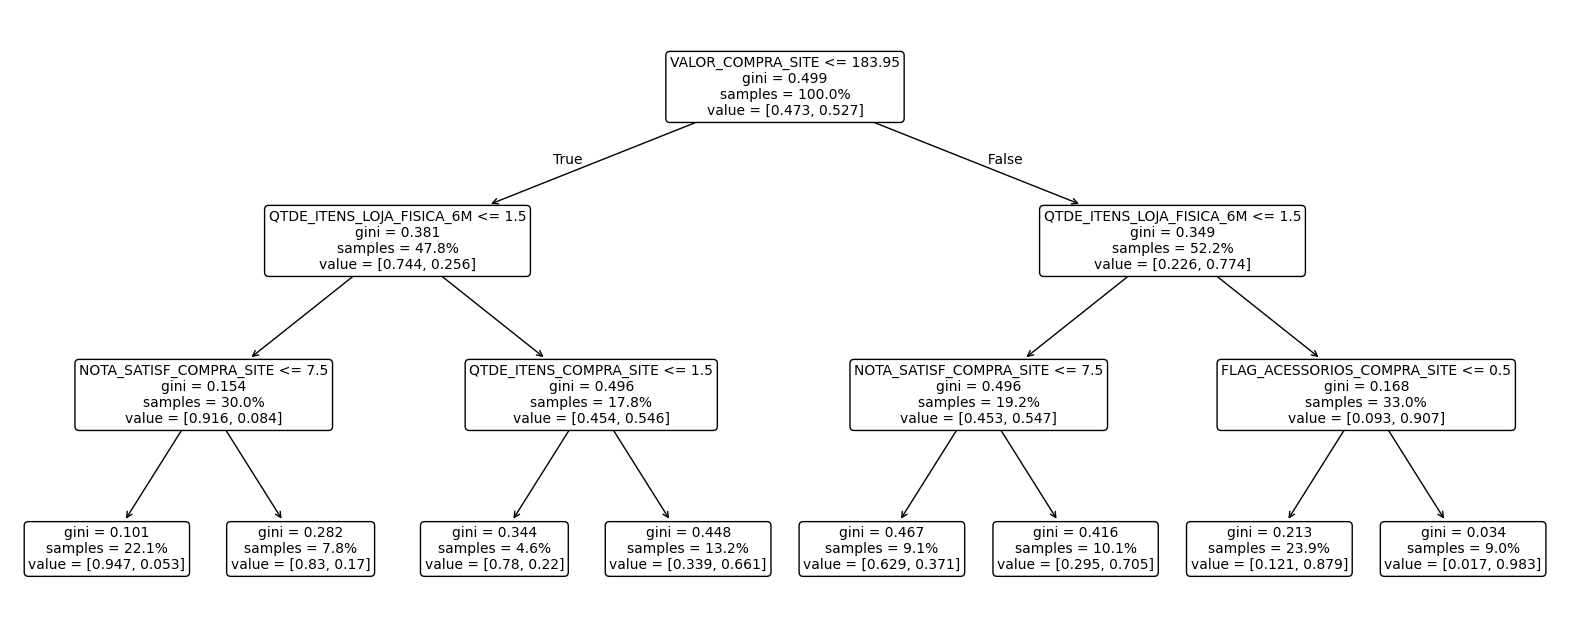

In [12]:
# Construção da árvore de decisão
arvore_1 = tree.DecisionTreeClassifier(criterion = 'gini', min_impurity_decrease = 0.001, min_samples_leaf = 50, max_depth = 3, random_state = 123)
arvore_1 = arvore_1.fit(X, y)

# Visualização da árvore de decisão
plt.figure(figsize = (20, 8))
tree.plot_tree(arvore_1,
               feature_names = X.columns,
               fontsize = 10,
               rounded = True,
               proportion = True)
plt.show()

### Modelo 2: árvore de decisão (com hiperparâmetros mais abrangentes)

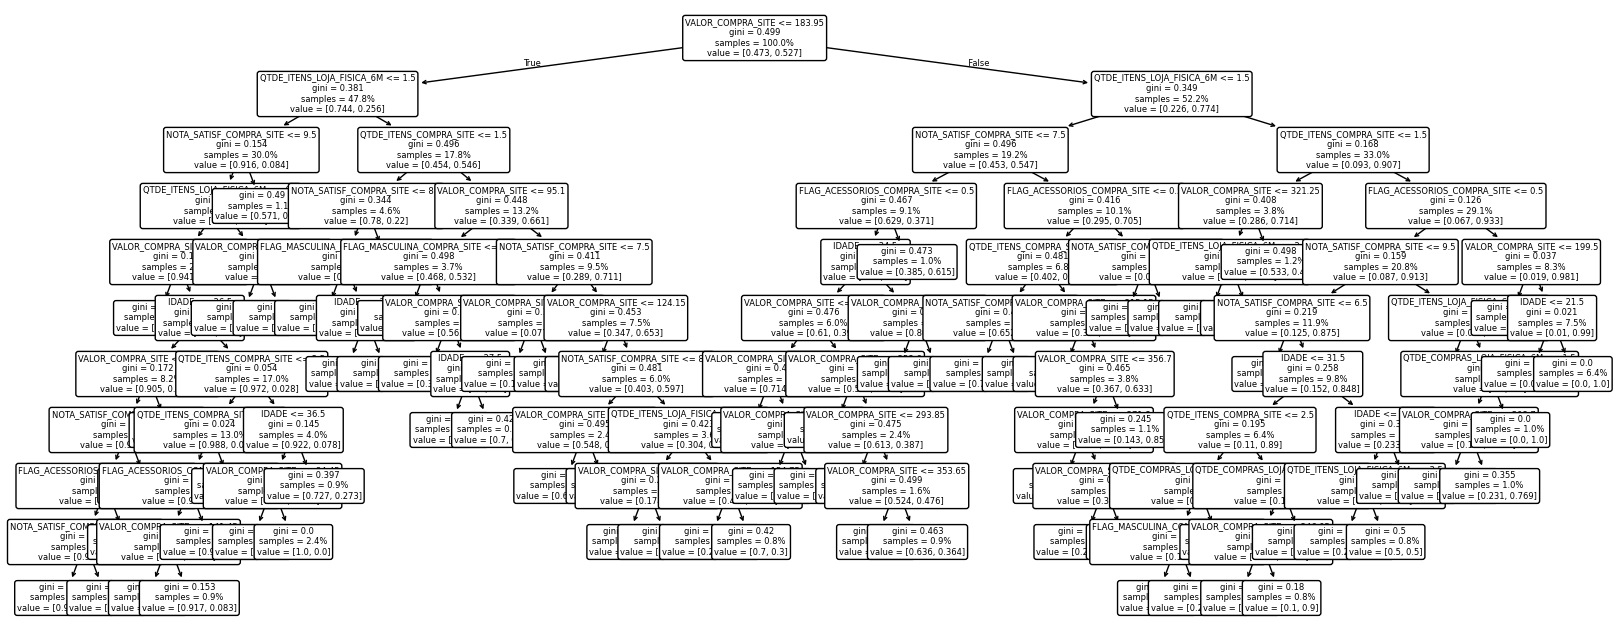

In [13]:
# Construção da árvore de decisão
arvore_2 = tree.DecisionTreeClassifier(criterion = 'gini', min_impurity_decrease = 0, min_samples_leaf = 10, max_depth = 10, random_state = 123)
arvore_2 = arvore_2.fit(X, y)

# Visualização da árvore de decisão
plt.figure(figsize = (20, 8))
tree.plot_tree(arvore_2,
               feature_names = X.columns,
               fontsize = 6,
               rounded = True,
               proportion = True)
plt.show()

### Modelo 1: validação simples (hold-out validation)

In [14]:
# Separação de conjuntos de treino e teste, de forma aleatória, com base em semente 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [15]:
# Ajuste do modelo em conjunto de treino
arvore_1_treino = tree.DecisionTreeClassifier(criterion = 'gini', min_impurity_decrease = 0.001, min_samples_leaf = 50, max_depth = 3, random_state = 123)
arvore_1_treino = arvore_1_treino.fit(X_treino, y_treino)

In [16]:
# Aplicação do modelo (cálculo das probabilidades preditas) em conjunto de teste
y_prob = arvore_1_treino.predict_proba(X_teste)[:,1]

In [17]:
# Definição de ponto de corte
ponto_corte = y_teste.astype(int).mean()
print(ponto_corte)

0.5098039215686274


In [18]:
# Atribuição da categoria predita
y_pred = (y_prob >= ponto_corte).astype(int)

In [19]:
# Desempenho (AUC)
auc = roc_auc_score(y_teste, y_prob)
print(auc)

0.8378461538461539


In [20]:
# Cálculo da curva ROC
fpr, tpr, _ = roc_curve(y_teste, y_prob)

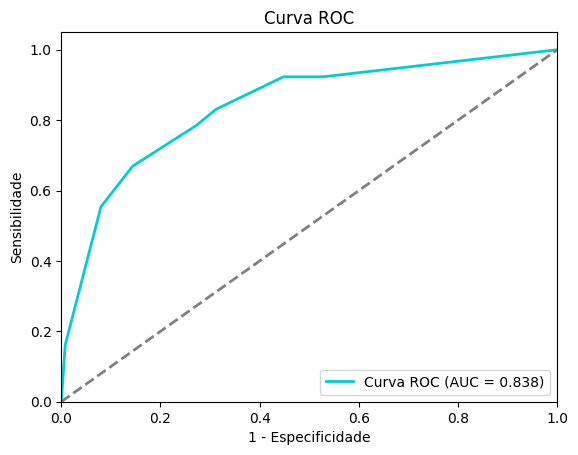

In [21]:
# Exibição da curva ROC
plt.figure()
plt.plot(fpr, tpr, color = 'darkturquoise', lw = 2, label = 'Curva ROC (AUC = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color = 'gray', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc = "lower right")
plt.show()

In [22]:
# Desempenho: acurácia, sensibilidade, especificidade
acuracia       = accuracy_score(y_teste, y_pred)
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred).ravel()
sensibilidade  = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f'Acurácia: {acuracia:.2f}')
print(f'Sensibilidade: {sensibilidade:.2f}')
print(f'Especificidade: {especificidade:.2f}')

Acurácia: 0.76
Sensibilidade: 0.78
Especificidade: 0.73


### Modelo 2: validação simples (hold-out validation)

In [23]:
# Ajuste do modelo em conjunto de treino
arvore_2_treino = tree.DecisionTreeClassifier(criterion = 'gini', min_impurity_decrease = 0, min_samples_leaf = 10, max_depth = 10, random_state = 123)
arvore_2_treino = arvore_2_treino.fit(X_treino, y_treino)

In [24]:
# Aplicação do modelo (cálculo das probabilidades preditas) em conjunto de teste
y_prob = arvore_2_treino.predict_proba(X_teste)[:,1]

In [25]:
# Definição de ponto de corte
ponto_corte = y_teste.astype(int).mean()
print(ponto_corte)

0.5098039215686274


In [26]:
# Atribuição da categoria predita
y_pred = (y_prob >= ponto_corte).astype(int)

In [27]:
# Desempenho (AUC)
auc = roc_auc_score(y_teste, y_prob)
print(auc)

0.8493538461538461


In [28]:
# Cálculo da curva ROC
fpr, tpr, _ = roc_curve(y_teste, y_prob)

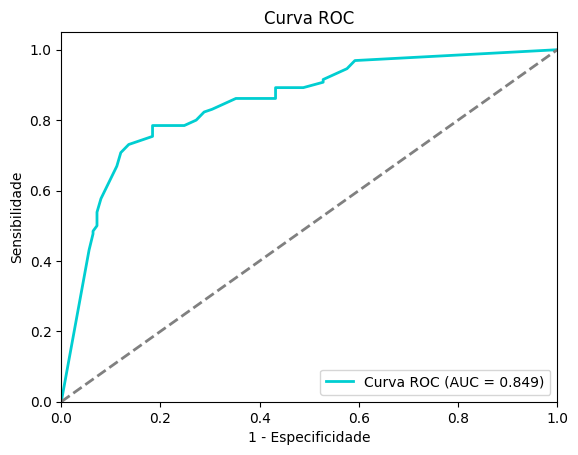

In [29]:
# Exibição da curva ROC
plt.figure()
plt.plot(fpr, tpr, color = 'darkturquoise', lw = 2, label = 'Curva ROC (AUC = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color = 'gray', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc = "lower right")
plt.show()

In [30]:
# Desempenho: acurácia, sensibilidade, especificidade
acuracia       = accuracy_score(y_teste, y_pred)
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred).ravel()
sensibilidade  = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f'Acurácia: {acuracia:.2f}')
print(f'Sensibilidade: {sensibilidade:.2f}')
print(f'Especificidade: {especificidade:.2f}')

Acurácia: 0.76
Sensibilidade: 0.80
Especificidade: 0.73


### Modelo 1: validação cruzada (k-fold cross validation)

In [31]:
# Validação cruzada com k = 10 folds
cv = KFold(n_splits = 10, shuffle = True, random_state = 123)
auc_scores_arvore_1 = cross_val_score(arvore_1, X, y, cv = cv, scoring = 'roc_auc')

In [32]:
# Valores de AUC para cada fold
print(auc_scores_arvore_1)

[0.87096774 0.84901961 0.84432234 0.89447171 0.90145334 0.8702877
 0.88722084 0.89555222 0.92630785 0.88233083]


In [33]:
# AUC médio dos folds
auc_scores_arvore_1.mean()

0.8821934187092653

In [34]:
# Desvio padrão de AUC dos folds
auc_scores_arvore_1.std()

0.02339661818332458

### Modelo 2: validação cruzada (k-fold cross validation)

In [70]:
# Validação cruzada com k = 10 folds
cv = KFold(n_splits = 10, shuffle = True, random_state = 123)
auc_scores_arvore_2 = cross_val_score(arvore_2, X, y, cv = cv, scoring = 'roc_auc')

In [71]:
# Valores de AUC para cada fold
print(auc_scores_arvore_2)

[0.82734604 0.82941176 0.82100122 0.85649703 0.90515043 0.86743552
 0.86861042 0.88393303 0.91247485 0.8406015 ]


In [72]:
# AUC médio dos folds
auc_scores_arvore_2.mean()

0.8612461813453034

In [38]:
# Desvio padrão de AUC dos folds
auc_scores_arvore_2.std()

0.030643525415010153

### Modelo 3: árvore de decisão com otimização de hiperparâmetros via validação cruzada, com grid search

In [39]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 50, 100],
    'max_depth': [2, 3, 5, 10]
}

In [40]:
# Busca da melhor combinação de hiperparâmetros, via validação cruzada com grid search, com otimização de AUC e k = 10
arvore = tree.DecisionTreeClassifier(random_state = 123)
cv = KFold(n_splits = 10, shuffle = True, random_state = 123)
scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
grid_search = GridSearchCV(arvore, param_grid, cv = cv, scoring = scoring, refit = 'AUC')
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
                         'min_samples_leaf': [10, 20, 50, 100]},
             refit='AUC',
             scoring={'AUC': 'roc_auc',
                      'balanced_accuracy': 'balanced_accuracy',
                      'recall': 'recall'})

In [41]:
# Melhor configuração de hiperparâmetros identificada
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20}


In [42]:
# Tabela de desempenho com todas as combinações de hiperparâmetros testadas, ordenadas do maior para o menor AUC médio nos conjuntos de teste
resultados_grid = pd.DataFrame(grid_search.cv_results_)
resultados_grid = resultados_grid[['params',
                                   'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC',
                                   'mean_test_balanced_accuracy', 'std_test_balanced_accuracy', 'rank_test_balanced_accuracy',
                                   'mean_test_recall', 'std_test_recall', 'rank_test_recall']].sort_values(by = 'rank_test_AUC')
resultados_grid

,params,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,std_test_recall,rank_test_recall
97,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.885034,0.025094,1,0.811095,0.020850,19,0.810597,0.035068,91
33,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",0.884284,0.024781,2,0.811661,0.020660,10,0.816751,0.046878,65
50,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",0.883796,0.024883,3,0.818171,0.023566,1,0.859449,0.038969,39
114,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.883768,0.024428,4,0.813332,0.026492,3,0.859449,0.038969,39
18,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.882108,0.023519,5,0.813056,0.022411,5,0.832047,0.053977,52
...,...,...,...,...,...,...,...,...,...,...
60,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",0.750931,0.022424,113,0.750931,0.022424,81,0.760293,0.035222,113
61,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",0.750931,0.022424,113,0.750931,0.022424,81,0.760293,0.035222,113
62,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",0.750931,0.022424,113,0.750931,0.022424,81,0.760293,0.035222,113
31,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.750931,0.022424,113,0.750931,0.022424,81,0.760293,0.035222,113


In [43]:
# Modelo final a partir da melhor combinação de hiperparâmetros
arvore_3 = grid_search.best_estimator_

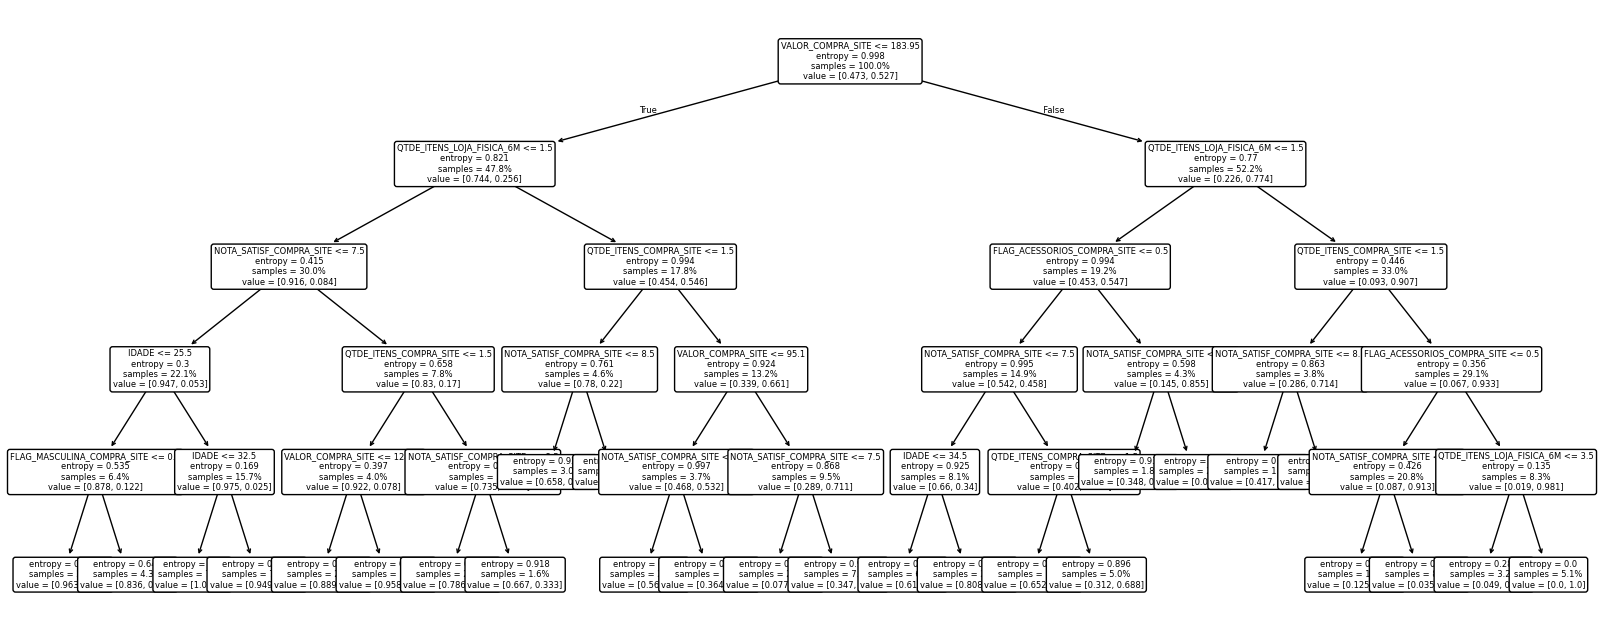

In [44]:
# Visualização da árvore de decisão correspondente ao melhor modelo (em 100% da base de dados)
plt.figure(figsize = (20, 8))
tree.plot_tree(arvore_3,
               feature_names = X.columns,
               fontsize = 6,
               rounded = True,
               proportion = True)
plt.show()

### Modelo 4: árvore de decisão com otimização de hiperparâmetros via validação cruzada, com random search

In [45]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.11, 0.01),
    'min_samples_leaf': np.arange(10, 101),
    'max_depth': np.arange(2, 11)
}

In [46]:
# Busca da melhor combinação de hiperparâmetros, via validação cruzada com random search, com otimização de AUC e k = 10
arvore = tree.DecisionTreeClassifier(random_state = 123)
cv = KFold(n_splits = 10, shuffle = True, random_state = 123)
scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
random_search = RandomizedSearchCV(arvore, param_grid, cv = cv, scoring = scoring, refit = 'AUC', n_iter = 100, random_state = 123)
random_search.fit(X, y)

/usr/local/lib/python3.9/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=123),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                                        'min_samples_leaf': array([ 10,  11,  12,  13,  14...
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])},
                   random_state=123, refit='AUC',
                   scoring={'AUC': 'roc_auc',
                            'balanced_accuracy': 'balanced_accuracy',
                            'recall': 'recall'})

In [47]:
# Melhor configuração de hiperparâmetros identificada
print(random_search.best_params_)

{'min_samples_leaf': 45, 'min_impurity_decrease': 0.0, 'max_depth': 4, 'criterion': 'entropy'}


In [48]:
# Tabela com todas as combinações de hiperparâmetros testadas, ordenadas do maior para o menor AUC médio nos conjuntos de teste
resultados_grid = pd.DataFrame(random_search.cv_results_)
resultados_grid = resultados_grid[['params',
                                   'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC',
                                   'mean_test_balanced_accuracy', 'std_test_balanced_accuracy', 'rank_test_balanced_accuracy',
                                   'mean_test_recall', 'std_test_recall', 'rank_test_recall']].sort_values(by = 'rank_test_AUC')
resultados_grid

,params,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,std_test_recall,rank_test_recall
78,"{'min_samples_leaf': 45, 'min_impurity_decreas...",0.885958,0.027108,1,0.821624,0.029280,1,0.869296,0.041256,59
23,"{'min_samples_leaf': 30, 'min_impurity_decreas...",0.885312,0.030344,2,0.806647,0.029501,5,0.817646,0.057909,66
59,"{'min_samples_leaf': 41, 'min_impurity_decreas...",0.884300,0.027137,3,0.815833,0.026845,2,0.849294,0.028687,65
36,"{'min_samples_leaf': 25, 'min_impurity_decreas...",0.883654,0.031372,4,0.800290,0.027047,7,0.811227,0.054571,77
65,"{'min_samples_leaf': 31, 'min_impurity_decreas...",0.882928,0.027717,5,0.806647,0.029501,5,0.817646,0.057909,66
...,...,...,...,...,...,...,...,...,...,...
50,"{'min_samples_leaf': 70, 'min_impurity_decreas...",0.750931,0.022424,82,0.750931,0.022424,66,0.760293,0.035222,82
32,"{'min_samples_leaf': 86, 'min_impurity_decreas...",0.750931,0.022424,82,0.750931,0.022424,66,0.760293,0.035222,82
51,"{'min_samples_leaf': 36, 'min_impurity_decreas...",0.750931,0.022424,82,0.750931,0.022424,66,0.760293,0.035222,82
11,"{'min_samples_leaf': 83, 'min_impurity_decreas...",0.750931,0.022424,82,0.750931,0.022424,66,0.760293,0.035222,82


In [49]:
# Modelo final a partir da melhor combinação de hiperparâmetros
arvore_4 = random_search.best_estimator_

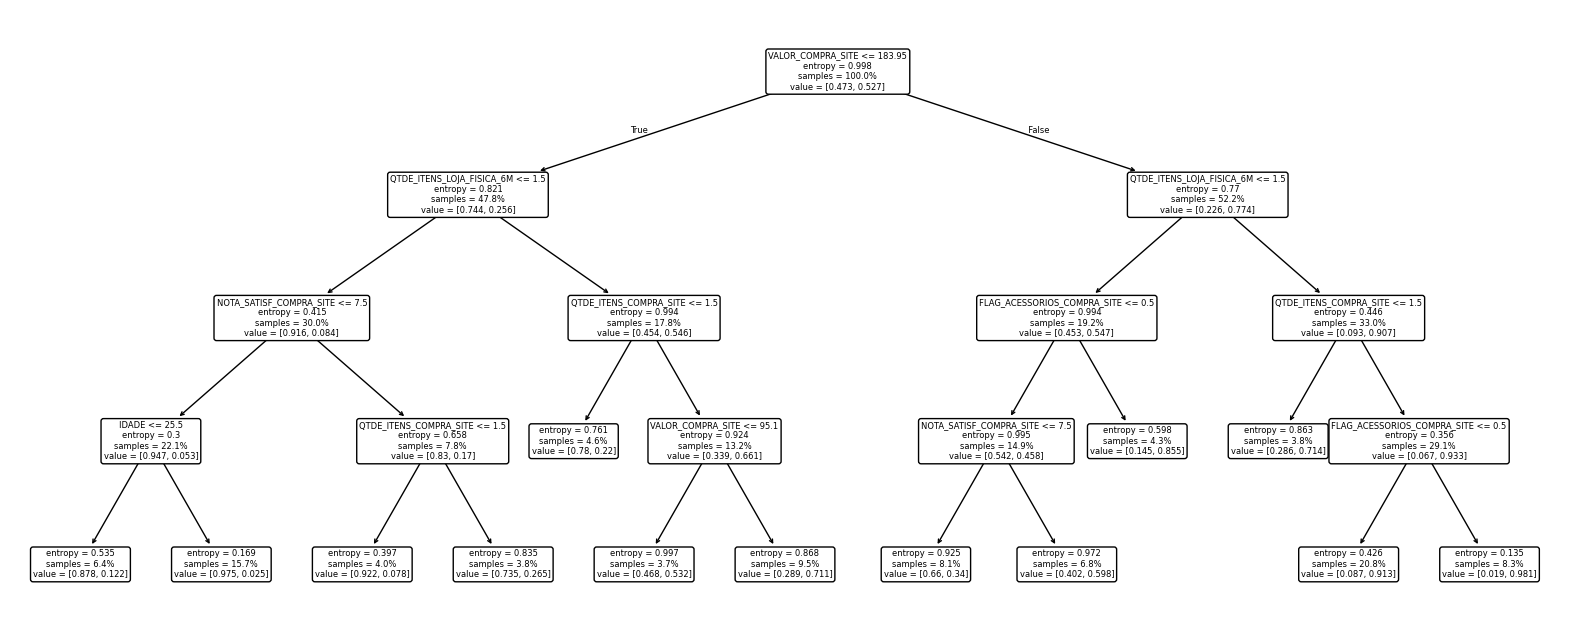

In [50]:
# Visualização da árvore de decisão correspondente ao melhor modelo (em 100% da base de dados)
plt.figure(figsize = (20, 8))
tree.plot_tree(arvore_4,
               feature_names = X.columns,
               fontsize = 6,
               rounded = True,
               proportion = True)
plt.show()

### Estimativa de desempenho do modelo 3 em dados totalmente apartados, via validação cruzada aninhada

In [51]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 50, 100],
    'max_depth': [2, 3, 5, 10]
}

In [52]:
# Validação cruzada aninhada com grid search e otimização de AUC, k1 = 3 e k2 = 5
arvore = tree.DecisionTreeClassifier(random_state = 123)
inner_cv = KFold(n_splits = 3, shuffle = True, random_state = 123)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 123)

scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
grid_search = GridSearchCV(arvore, param_grid, cv = inner_cv, scoring = scoring, refit = 'AUC')
nested_scores = cross_validate(grid_search, X = X, y = y, cv = outer_cv, scoring = scoring)

In [53]:
# AUC das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_AUC'].round(3))
print("Média de AUC: " + str(round(np.mean(nested_scores['test_AUC']), 3)))
print("D.P. de AUC: " + str(round(np.std(nested_scores['test_AUC']), 3)))

[0.858 0.865 0.889 0.888 0.912]
Média de AUC: 0.882
D.P. de AUC: 0.019


In [54]:
# Acurácia balanceada das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_balanced_accuracy'].round(3))
print("Média de Acurácia Balanceada: " + str(round(np.mean(nested_scores['test_balanced_accuracy']), 3)))
print("D.P. de Acurácia Balanceada: " + str(round(np.std(nested_scores['test_balanced_accuracy']), 3)))

[0.8   0.771 0.817 0.815 0.843]
Média de Acurácia Balanceada: 0.809
D.P. de Acurácia Balanceada: 0.024


In [55]:
# Sensibilidade das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_recall'].round(3))
print("Média de Sensibilidade: " + str(round(np.mean(nested_scores['test_recall']), 3)))
print("D.P. de Sensibilidade: " + str(round(np.std(nested_scores['test_recall']), 3)))

[0.823 0.787 0.803 0.822 0.844]
Média de Sensibilidade: 0.816
D.P. de Sensibilidade: 0.019


### Estimativa de desempenho do modelo 4 em dados totalmente apartados, via validação cruzada aninhada

In [56]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.11, 0.01),
    'min_samples_leaf': np.arange(10, 101),
    'max_depth': np.arange(2, 11)
}

In [57]:
# Validação cruzada aninhada com random search e otimização de AUC, k1 = 3 e k2 = 5
arvore = tree.DecisionTreeClassifier(random_state = 123)
inner_cv = KFold(n_splits = 3, shuffle = True, random_state = 123)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 123)

scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
random_search = RandomizedSearchCV(arvore, param_grid, cv = inner_cv, scoring = scoring, refit = 'AUC', n_iter = 100, random_state = 123)
nested_scores = cross_validate(random_search, X = X, y = y, cv = outer_cv, scoring = scoring)

In [58]:
# AUC das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_AUC'].round(3))
print("Média de AUC: " + str(round(np.mean(nested_scores['test_AUC']), 3)))
print("D.P. de AUC: " + str(round(np.std(nested_scores['test_AUC']), 3)))

[0.846 0.878 0.89  0.886 0.906]
Média de AUC: 0.881
D.P. de AUC: 0.02


In [59]:
# Acurácia balanceada das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_balanced_accuracy'].round(3))
print("Média de Acurácia Balanceada: " + str(round(np.mean(nested_scores['test_balanced_accuracy']), 3)))
print("D.P. de Acurácia Balanceada: " + str(round(np.std(nested_scores['test_balanced_accuracy']), 3)))

[0.788 0.791 0.833 0.789 0.834]
Média de Acurácia Balanceada: 0.807
D.P. de Acurácia Balanceada: 0.022


In [60]:
# Sensibilidade das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_recall'].round(3))
print("Média de Sensibilidade: " + str(round(np.mean(nested_scores['test_recall']), 3)))
print("D.P. de Sensibilidade: " + str(round(np.std(nested_scores['test_recall']), 3)))

[0.785 0.837 0.869 0.778 0.867]
Média de Sensibilidade: 0.827
D.P. de Sensibilidade: 0.039


### Aplicação do modelo final de árvore de decisão na base de dados



In [61]:
# Aplicação do modelo (cálculo das probabilidades preditas)
y_prob = arvore_3.predict_proba(X)[:,1]

In [62]:
# Definição de ponto de corte
ponto_corte = y.astype(int).mean()

In [63]:
# Atribuição da categoria predita
dados_ecommerce['y_pred'] = (y_prob >= ponto_corte).astype(int)

### Importância das features do modelo final

In [64]:
# Cálculo de medida de importância de Gini
importancias = arvore_3.feature_importances_
features = X.columns

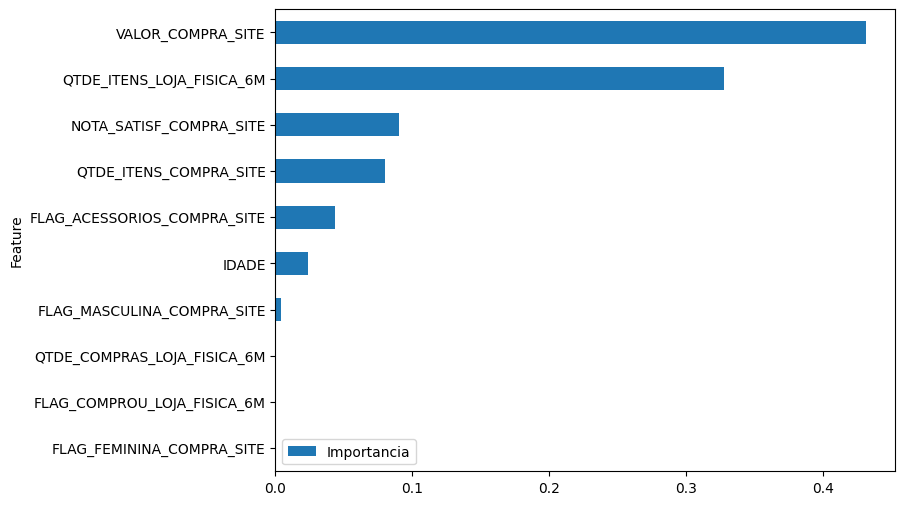

In [65]:
# Gráfico das importâncias de Gini
df_importancias = pd.DataFrame({'Feature': features, 'Importancia': importancias}).sort_values(by = 'Importancia', ascending = True)
df_importancias.plot.barh(x = 'Feature', y = 'Importancia', figsize = (8, 6))
plt.show()

In [66]:
# Cálculo de valores SHAP para as observações
explainer = shap.Explainer(arvore_3)
valores_shap = explainer(X)

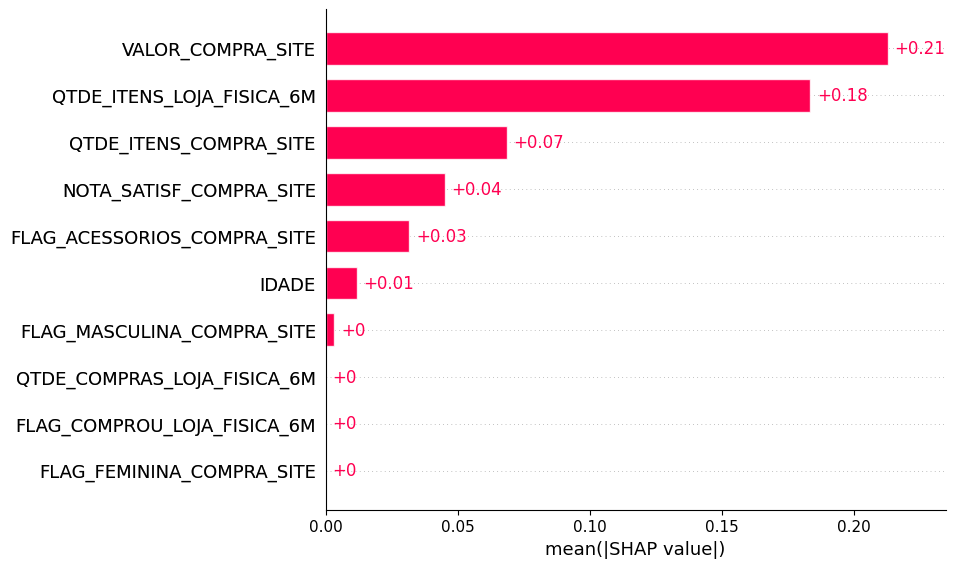

In [67]:
# Gráfico do SHAP absoluto médio por feature
shap.plots.bar(valores_shap[:,:,0])

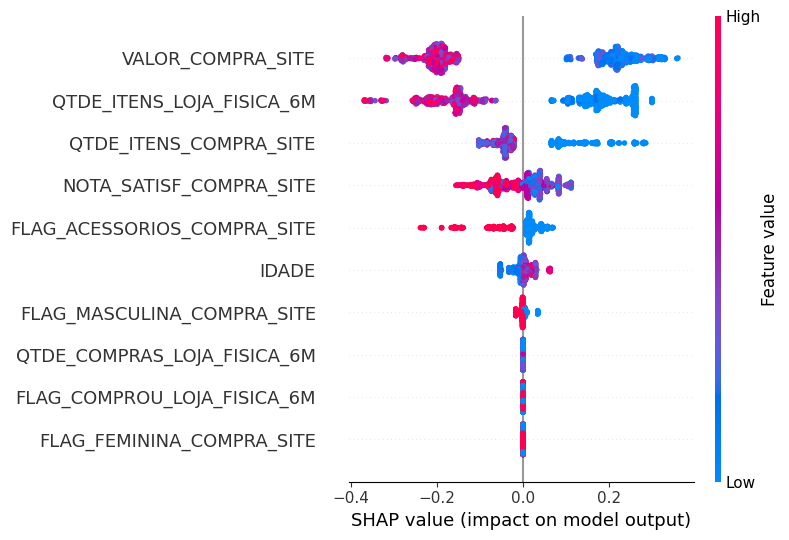

In [68]:
# Gráfico de distribuição de valores SHAP por feature: "enxame de abelhas" (beeswarm plot)
shap.summary_plot(valores_shap[:,:,0])